# Predicting Patient Outcomes in Liver Cirrhosis Using Machine Learning
## Assignment 1
### - Zain Abbas (4031481)
### - Kaivalya Pulekar (4074576)

## Importing necessary Libraries
To initiate the analysis, we begin by importing a set of libraries that provide essential functionality for data manipulation, visualization, preprocessing, and statistical analysis:

- **numpy and pandas**: These foundational libraries are used extensively throughout the report. numpy supports efficient numerical computation, while pandas is leveraged for handling structured tabular data through its powerful DataFrame object.

- **matplotlib.pyplot (as mtb) and seaborn**: These libraries are used to generate visualizations that support exploratory data analysis. matplotlib offers fine-grained control over plot elements, and seaborn builds upon it to provide aesthetically pleasing and statistically informative plots.

- **scatter_matrix from pandas.plotting**: This function is utilized to generate a grid of scatter plots for numerical variables. It is especially useful for visually assessing relationships, patterns, and potential multicollinearity among features.

In [339]:
import numpy as np
import pandas as pd
from sklearn.impute import IterativeImputer

import matplotlib.pyplot as mtb
import seaborn as sns

# Table of Contents
1. [Introduction](#Introduction)
    - [Dataset Source](#Dataset-Source)
    - [Dataset Details](#Dataset-details)
    - [Dataset Features](#Dataset-Features)
    - [Target Feature](#Target-Feature)
2. [Goals & Objectives](#Goals-&-Objectives)
3. [Data Cleaning & Preprocessing](#Data-Cleaning-&-Preprocessing)
    - [Summary Statistics](#summary-statistics)
    - [Handling Missing Values](#handling-missing-values)
    - [Data Transformation](#data-transformation)
4. [Data Exploration & Visualisation](#Data-Exploration-&-Visualisation)
    - [Univariate Plots](#univariate-plots)
    - [Trivariate Plots](#trivariate-plots)
    - [Bivariate Plots](#bivariate-plots)
5. [Literature Review](#Literature-Review)
6. [Summary & Conclusions](#Summary-&-Conclusions)
7. [References](#References)

## Introduction

This report presents the first phase of a supervised machine learning problem aimed at predicting drug assignment in patients with liver cirrhosis. 

### Dataset Source

The analysis is based on a clinical dataset titled cirrhosis.csv, which was obtained from a publicly available repository. Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984.(fedesoriano 2021) 

### Dataset Details

The dataset comprises anonymized medical records of 418 patients who participated in a clinical trial for cirrhosis treatment. Each row in the dataset represents a unique patient, with various biochemical, demographic, and clinical features recorded over time.
Upon loading the dataset, it is observed to contain 418 rows and 20 columns, where:
- Each row represents a unique patient who participated in the study.
- Each column corresponds to a clinical, demographic, or treatment-related attribute recorded during the patient's course of care.
- The dataset includes a mix of:
    - Numerical features (e.g., Bilirubin, Cholesterol, Platelets, Age, Prothrombin), many of which are standard biomarkers used to assess liver function.
    - Categorical features (e.g., Drug, Sex, Ascites, Edema), which describe patient characteristics and symptoms.
    - Ordinal features such as Stage, which represents the severity of liver disease on a scale from 1 to 4.
    - The target variable Drug, which specifies the treatment administered to the patient — either D-penicillamine or Placebo.


In [340]:
pd.set_option('display.max_columns', None)
data_orig = pd.read_csv("cirrhosis.csv")
print(data_orig.shape)
data_orig.head(10)

(418, 20)


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


### Dataset Features
Below is the table of all necessary features we have and we require for our analysis:

| **Feature Name** | **Data Type**          | **Units**           | **Brief Description**                                      |
|------------------|------------------------|----------------------|-------------------------------------------------------------|
| `N_Days`         | Numeric                | Days                 | Time from registration to event (death, transplant, or last contact) |
| `Drug`           | Nominal Categorical    | NA                   | Treatment type: D-penicillamine or Placebo                 |
| `Age`            | Numeric                | Days                 | Age of the patient at registration                          |
| `Sex`            | Boolean                | NA                   | Sex of the patient: M or F                                 |
| `Ascites`        | Boolean                | NA                   | Presence of ascites (Yes/No)                               |
| `Hepatomegaly`   | Boolean                | NA                   | Presence of hepatomegaly (Yes/No)                          |
| `Spiders`        | Boolean                | NA                   | Presence of spider angiomata (Yes/No)                      |
| `Edema`          | Ordinal Categorical    | NA                   | Edema severity: N (No), S (Slight), Y (Marked)             |
| `Bilirubin`      | Numeric                | mg/dL                | Total serum bilirubin level                                |
| `Cholesterol`    | Numeric                | mg/dL                | Serum cholesterol level                                     |
| `Albumin`        | Numeric                | g/dL                 | Serum albumin level                                         |
| `Copper`         | Numeric                | µg/dL                | Serum copper level                                          |
| `Alk_Phos`       | Numeric                | U/L                  | Alkaline phosphatase level                                  |
| `SGOT`           | Numeric                | U/mL                 | Serum glutamic-oxaloacetic transaminase (AST) level         |
| `Tryglicerides`  | Numeric                | mg/dL                | Serum triglyceride level                                   |
| `Platelets`      | Numeric                | 10⁹/L                | Platelet count                                              |
| `Prothrombin`    | Numeric                | seconds              | Prothrombin time (blood clotting time)                     |
| `Stage`          | Ordinal Categorical    | NA                   | Histologic stage of disease (1 to 4)                       |



### Target Feature
The target variable for this study is Status, a categorical feature indicating the survival status of patients.

| **Target Name** | **Data Type**          | **Units**           | **Brief Description**                                      |
|------------------|------------------------|----------------------|-------------------------------------------------------------|
| `Status`           | Nominal Categorical    | NA                   | Outcome Status: C (Censored), CL (Liver Transplant), D(Death)   |

## Goals & Objectives

The goal is to identify key patient characteristics that may influence drug assignment and ultimately develop a classification model to automate this prediction.

## Loading Dataset
The dataset under investigation loaded in below code, titled cirrhosis.csv, comprises clinical records from a historical medical study involving patients diagnosed with liver cirrhosis. Upon loading the dataset, it is observed to contain 418 rows and 20 columns, where:

- Each row represents a unique patient who participated in the study.
- Each column corresponds to a clinical, demographic, or treatment-related attribute recorded during the patient's course of care.
- The dataset includes a mix of:
    
    - Numerical features (e.g., Bilirubin, Cholesterol, Platelets, Age, Prothrombin), many of which are standard biomarkers used to assess liver function.
    - Categorical features (e.g., Drug, Sex, Ascites, Edema), which describe patient characteristics and symptoms.
    - Ordinal features such as Stage, which represents the severity of liver disease on a scale from 1 to 4.
    - The target variable Drug, which specifies the treatment administered to the patient — either D-penicillamine or Placebo.

Following the loading of dataset, we demonstrate the few starting observations of the data, its dimensions as mentioned above and basic summary statistics of this raw data.

## Data Cleaning & Preprocessing

### Summary Statistics
Upon inspecting below the summary statistics of the raw dataset, several patterns and insights can be observed:
- Features such as Bilirubin, Cholesterol, and Triglycerides exhibit high variance and wide ranges, which may indicate the presence of outliers or skewed distributions. This will be explored further in the visualization section.
- The Age column is recorded in days, with a maximum value exceeding 28,000, corresponding to patients older than 75 years. This will later be converted to a more interpretable format (years).
- Missing values are implied by inconsistent count values across columns — for example, if Bilirubin has a count of 400 but Cholesterol only 300, this indicates missing entries that must be handled prior to modeling.
- The Prothrombin time and Platelets counts exhibit wide interquartile ranges, suggesting substantial variability in coagulation profiles among patients.
- These initial statistics serve as a foundation for identifying potential data quality issues and understanding the scale and spread of each variable prior to preprocessing.

In [341]:
data_orig.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


### Handling Missing Values
In this section, we will check for all the missing values, provide reasons (if we know) for that and act accordingly to treat those values. On investigating the source (fedesoriano, 2021), we know that out of 424 patients, 112 cases did not participate in the clinical trial but consented for basic measurements. Out of these, records of 6 were lost and 106 were registered in the dataset. So, we can infer that these 106 did not get any treatment and so have the 'Drug' column missing.

- As these 106 values were not in the trials, we add a new column named 'participants' to give us participation status of the patient and split the dataset into 2:
    - Participants dataset that contains 312 rows and 21 columns. This will be used for modelling as only these patients actually participated in the trials.
    - Non_participants dataset that contains 106 row and 21 columns. This will be kept for the record and would be rarely used.
- We will then make decisions on what values are left according to the type of variables that contain missing values.

In [342]:
data_mod = data_orig.copy()
print(np.sum(data_mod.isna()))

data_mod['Participated'] = data_mod['Drug'].notna().astype(int)
non_participant = data_mod[data_mod['Participated']==0]
participant = data_mod[data_mod['Participated']== 1]
print("Data of patients who participated in the clinical trials\n", participant.head())
print("Data of patients who did not participate in the clinical trials\n", non_participant.head())
participant.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64
Data of patients who participated in the clinical trials
    ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Ch

c:\Users\hp\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
Participated      0
dtype: int64

After splitting the dataset based on the information provided by the source, we now deal with the remaining columns containing missing values. All these columns, namely 'Tryglicerides', 'Cholesterol', 'Platelets' and 'Copper', are numeric data type. Here we will use **MICE (Multiple Imputation by Chained Equation)**.

In [343]:
imputer = IterativeImputer(random_state=42)
columns_to_impute = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']
cirihosis_imputed = participant.copy()
cirihosis_imputed[columns_to_impute] = imputer.fit_transform(participant[columns_to_impute])
print(cirihosis_imputed[columns_to_impute].head())

np.sum(cirihosis_imputed.isna())

   Cholesterol  Copper  Tryglicerides  Platelets
0        261.0   156.0          172.0      190.0
1        302.0    54.0           88.0      221.0
2        176.0   210.0           55.0      151.0
3        244.0    64.0           92.0      183.0
4        279.0   143.0           72.0      136.0


c:\Users\hp\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Participated     0
dtype: int64

The above block of code handles missing values in four key biochemical columns using different MICE imputation strategy because:

- preserve variable relationships and supports are objective of modelling/analysis with multiple predictors.
- Dataset is small
- The missing percentage is not very high and missing at random (MAR)..

Columns are now ready for transformation or scaling if needed.

At this point, all are missing values have been successfully handled through source information and advanced imputation techniques like MICE. We will now proceed to remove and change certain unnecessary columns.

### Data Transformation
This code block below completes multiple data transformation steps to prepare the dataset for machine learning modeling:

**Dropping Unnecessary Columns**

- The 'ID' column is dropped using .drop(). ID is just an identifier and has no predictive value.
- The 'Participated' column is dropped using .drop(). This column was created to split the dataset into participating and non-participating patients and so it is no longer needed.

In [344]:
cirihosis_imputed = cirihosis_imputed.drop(['ID','Participated'], axis=1)
cirihosis_imputed

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


## Data Exploration & Visualisation
In this section, our aim is to find out:

- How all predictors behave in a univariate distribution.
- How the target class (status) is distributed.
- Detect multicollinearity and how multiple features behave when grouped by class.


### Univariate Plots

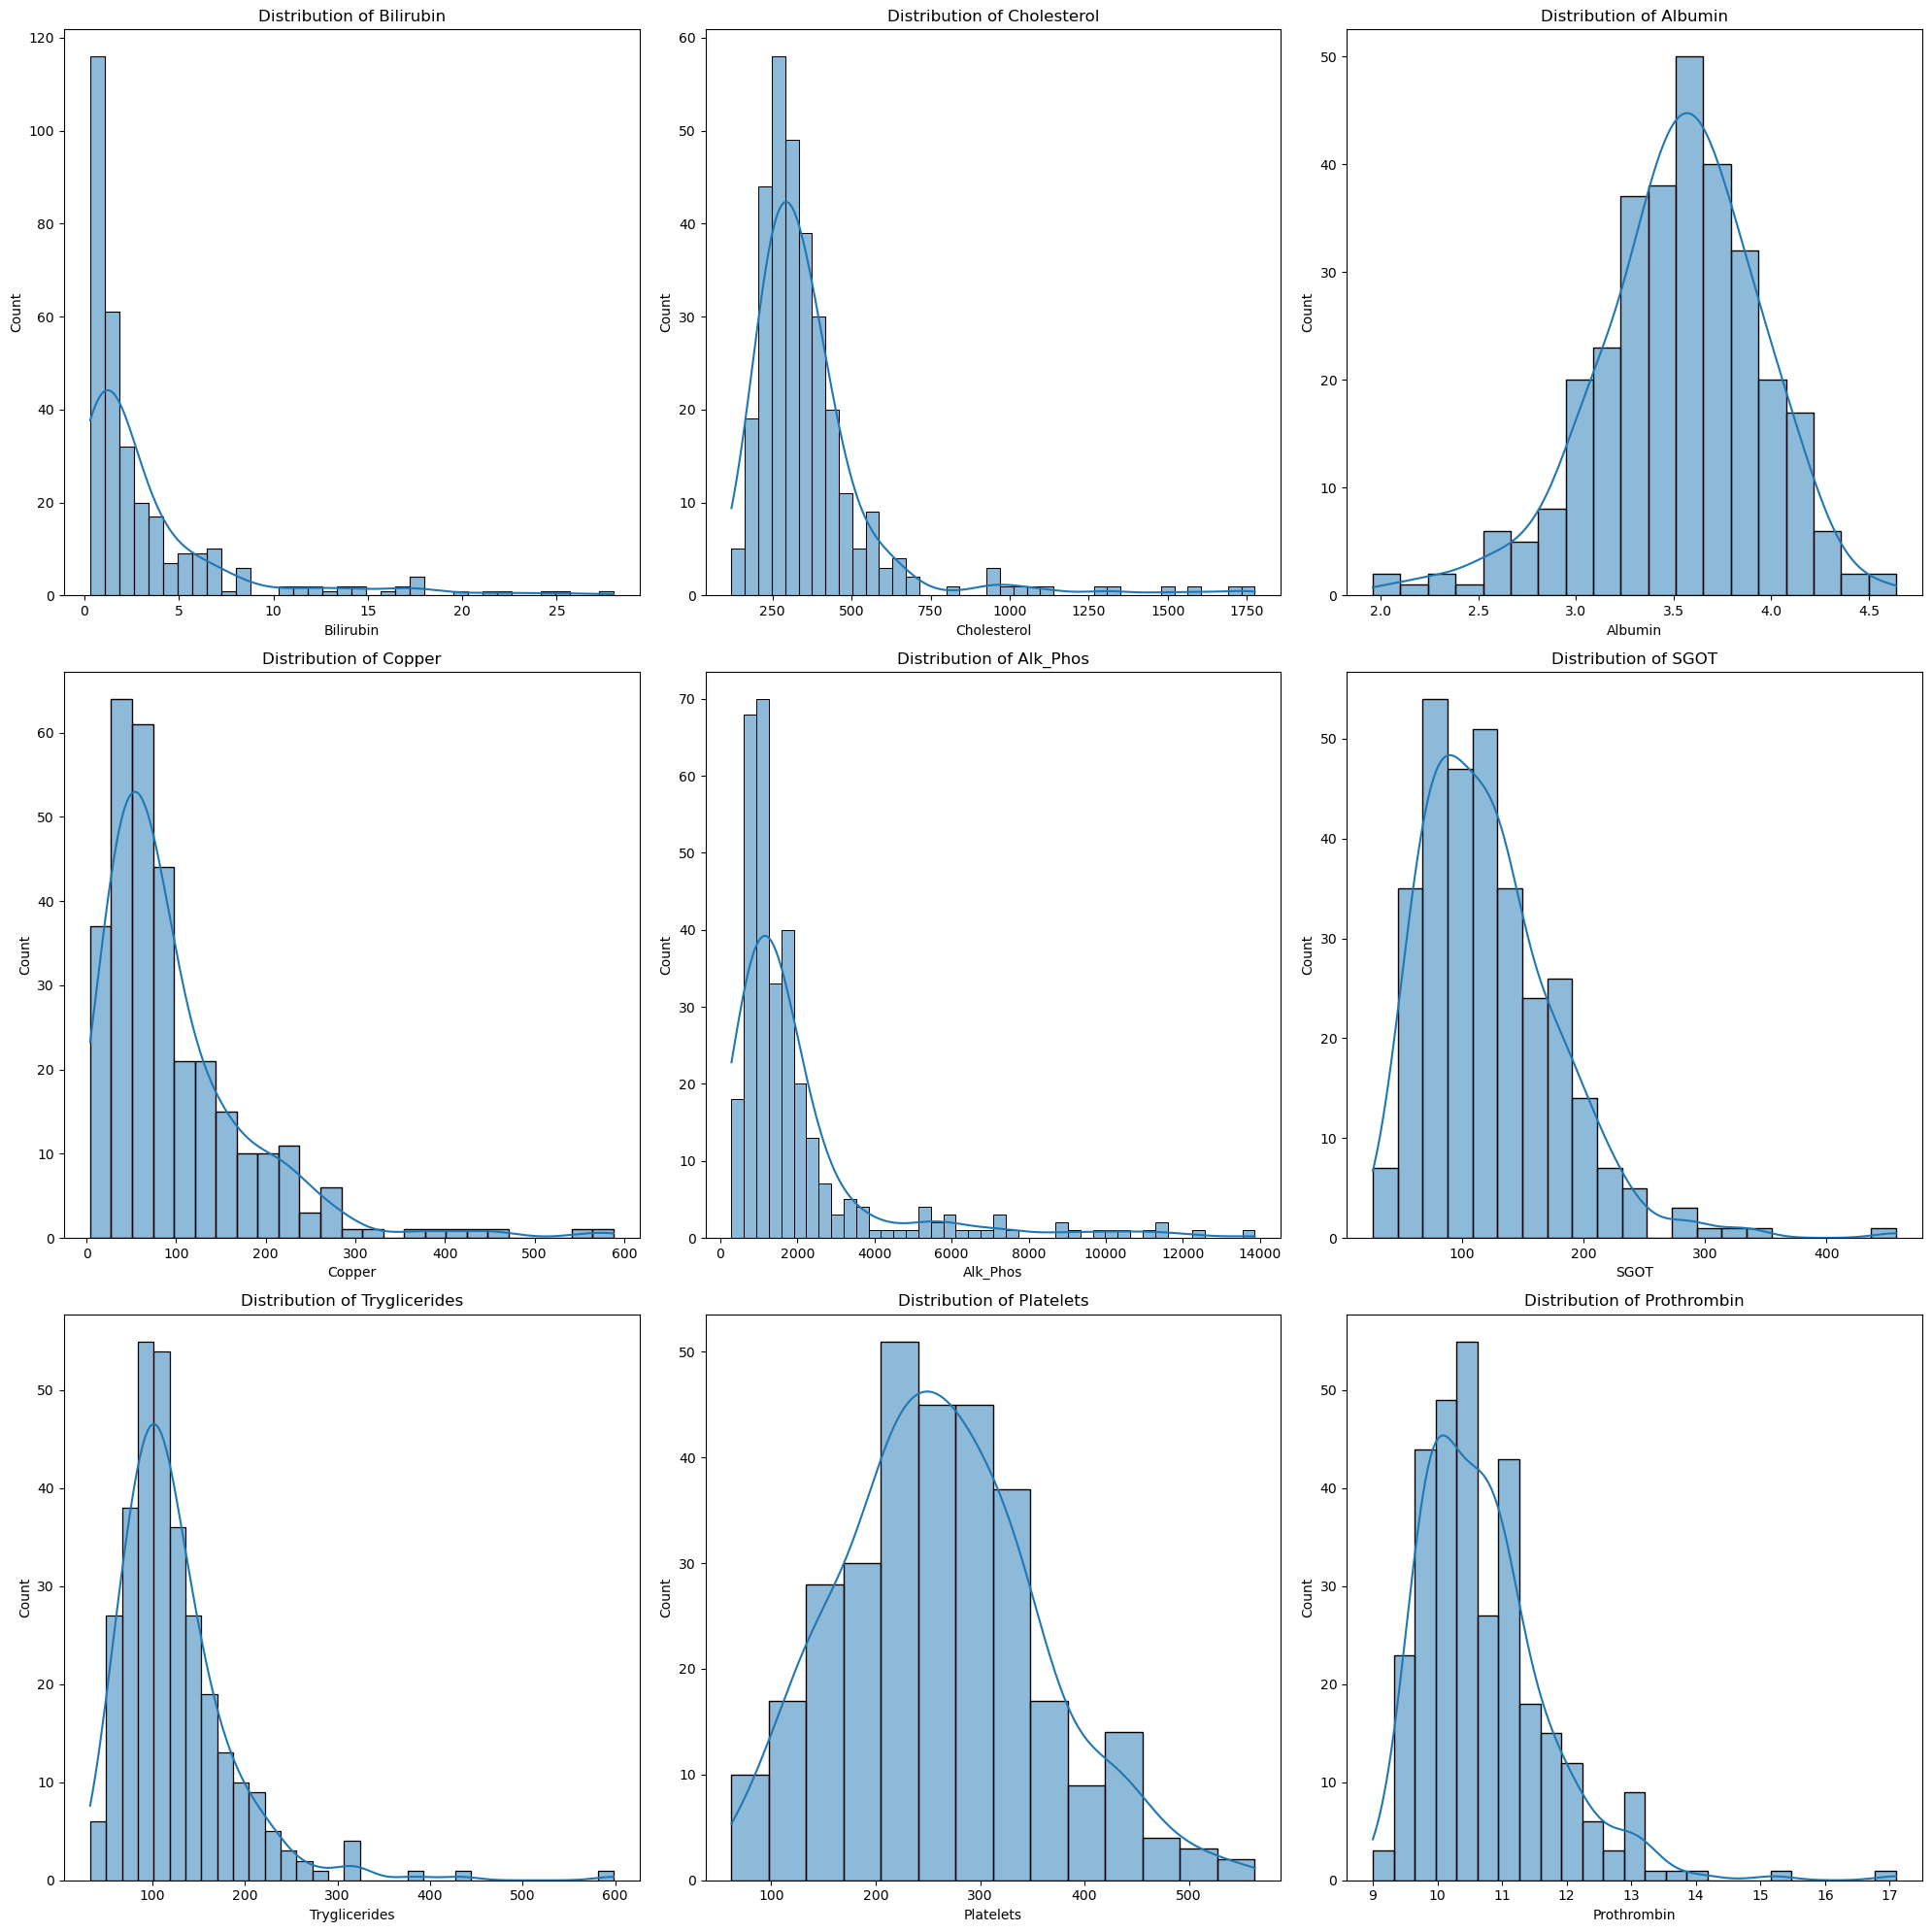

In [346]:
n_row = 3
n_col = 3
num_cols = cirihosis_imputed.select_dtypes(include='number').columns.drop(['N_Days','Age','Stage']).to_list()
fig, axes = mtb.subplots(n_row, n_col, figsize = (20,20))
axes = axes.reshape(n_row, n_col)
for r,c in enumerate(num_cols):
    row, col = divmod(r, n_col)
    sns.histplot(cirihosis_imputed[c],kde=True, ax=axes[row,col])
    axes[row,col].set_title(f'Distribution of {c}')
    axes[row,col].set_xlabel(c)
    axes[row,col].set_ylabel("Count")
mtb.tight_layout()
mtb.show()

This visualization shows the distribution of scaled Bilirubin levels across patients in the dataset.

**Graph Interpretation**
- The distribution is highly right-skewed, even after standardization.
- Most values are concentrated around –0.5 to 0, with a rapid drop-off in frequency as values increase.
- The long right tail indicates a few patients with significantly elevated bilirubin levels, potentially reflecting severe liver dysfunction or outliers.
- The peak near zero is expected due to the nature of standard scaling, where the mean is centered at 0.

To conclude, this graph reveals that Bilirubin is not normally distributed, even post-scaling. The presence of outliers and skewness could impact model assumptions and might require additional transformation depending on the algorithm used.

This plot visualizes the distribution of the Cholesterol variable after standard scaling.

**Graph Interpretation**
- The distribution is right-skewed, with most values clustered between –1 and +1.
- A long tail is visible on the right, indicating the presence of some higher cholesterol values even after standardization.
- The highest frequency of observations lies around 0, which reflects the mean-centered nature of standardized data.
- The shape of the curve suggests that cholesterol levels vary across patients, and the skewness may hint at underlying health conditions or subgroup variations.

This concludes that plot confirms that while standard scaling has centered the feature, the original non-normal distribution of cholesterol remains. This insight is valuable when choosing models that assume normality or when considering further transformation (e.g., log-scaling) if needed.

This plot illustrates the distribution of scaled Albumin levels among patients in the cirrhosis dataset.

**Graph Interpretation**
- The distribution of Albumin is approximately normal, centered around zero, as expected after standard scaling.
- The shape is symmetrical, with frequencies tapering off evenly on both sides — indicating low skewness and balanced spread.
- This suggests that Albumin values are relatively well-behaved and do not contain significant outliers or irregularities.

To conclude, unlike other clinical variables, Albumin shows a near-perfect bell curve, validating that this feature is naturally well-distributed and benefits effectively from standard scaling. It is likely to contribute robustly to classification models without needing additional transformation.

This plot visualizes the distribution of scaled Copper values, providing insights into its spread and skewness in the patient dataset.

**Graph Interpretation**

- The distribution is positively skewed (right-skewed), even after scaling.
- Most values fall between –1.5 and 1, with a long tail extending toward higher copper levels.
- A high concentration of observations is centered around 0, reflecting the mean-centered nature of standard scaling.
- The long tail indicates potential outliers or a subset of patients with elevated copper levels, which could be clinically relevant in liver disease progression.

To conclude, although scaled, Copper still exhibits non-normal characteristics, with a sharp peak and rightward skew. This could influence model performance for algorithms sensitive to feature distribution. The plot suggests that further transformation or binning may be considered based on the modeling technique used. But in case of modelling techniques like logistic regression, skewedness of features will not be a problem.

This plot presents the distribution of the scaled Alkaline Phosphatase (Alk_Phos) levels in the cirrhosis dataset.

**Graph Interpretation**
- The distribution is heavily right-skewed, meaning most patients have lower Alk_Phos values, with fewer individuals showing extremely high levels.
- The peak of the histogram is around 0 (as expected with standardized data), but a long tail extends to the right.
- This pattern suggests the presence of outliers or high variability, which is typical in liver disease patients where elevated Alk_Phos may indicate bile duct obstruction or bone involvement.
- The density curve supports the histogram, emphasizing the steep rise and gradual decline, confirming the skewed nature of the feature.

To conclude, despite standard scaling, Alk_Phos remains non-normally distributed, highlighting potential challenges for models assuming normality. The skewness may warrant log transformation or robust algorithms that handle non-normal data effectively.

This plot visualizes the distribution of scaled SGOT (Serum Glutamic-Oxaloacetic Transaminase) levels in patients with cirrhosis.

**Graph Interpretation**
- The distribution of SGOT is positively skewed, with the bulk of values between –1.5 and +1 and a long tail extending to the right.
- The peak near 0 aligns with the standardized mean (due to scaling), while the extended right tail indicates the presence of patients with high SGOT levels, which may reflect liver inflammation or damage.
- The histogram shows that while most patients have moderate levels, a few outliers may exist with extremely high SGOT, possibly representing more severe conditions.

To conclude, This distribution reveals that SGOT is not normally distributed, even after standardization. The skewness and presence of high-value outliers should be considered when selecting and tuning machine learning models, especially if the model assumes normally distributed features.

This histogram displays the distribution of scaled Triglyceride levels in the cirrhosis dataset.

**Graph Interpretation**
- The distribution is right-skewed, with a concentration of values just below and above zero.
- A long tail stretches beyond the value of 6, indicating extreme outliers or abnormal clinical cases.
- The peak near 0 represents the standardized mean (as expected from StandardScaler), with frequency sharply declining as values increase.
- This skewed pattern suggests that a minority of patients have abnormally high triglyceride levels, which may be clinically significant.

To conclude, the distribution of Triglycerides remains non-normal even after scaling. This insight is important when applying machine learning models — particularly ones sensitive to feature distribution. Consider robust models or transformations (like log scaling) if further normalization is needed.

This plot presents the distribution of standardized Platelet counts across patients in the cirrhosis dataset.

**Graph Interpretation**
- The distribution is slightly right-skewed, with most values concentrated between –1.5 and +1.5.
- There is a peak near zero, which is expected due to standard scaling centering the data.
- While the curve appears fairly bell-shaped, it is not perfectly symmetrical, indicating some mild skewness and the presence of a few high-count outliers.
- This suggests that Platelet levels are relatively normally distributed, making this feature suitable for many machine learning algorithms without the need for transformation.

To conclude, the Platelet count feature shows a near-normal distribution after standard scaling. This makes it a statistically stable and model-friendly feature that can be readily used in logistic regression and other algorithms without requiring transformation.

This visualization illustrates the distribution of standardized Prothrombin levels, a critical blood clotting factor measured in cirrhosis patients.

**Graph Interpretation**
- The distribution is strongly right-skewed, indicating that while most patients have average or below-average prothrombin levels (centered around 0 due to scaling), a subset exhibits significantly elevated values.
- The sharp peak near zero corresponds to the mean, while the long right tail reflects clinical outliers who may be at greater risk due to coagulation issues.
- This skewness highlights the importance of this variable in assessing liver function and prognosis.

To conclude, 
Prothrombin is a highly skewed feature even after standardization. This distribution is important to understand when selecting modeling techniques, and might benefit from log transformation or the use of tree-based models that are robust to skewed inputs.

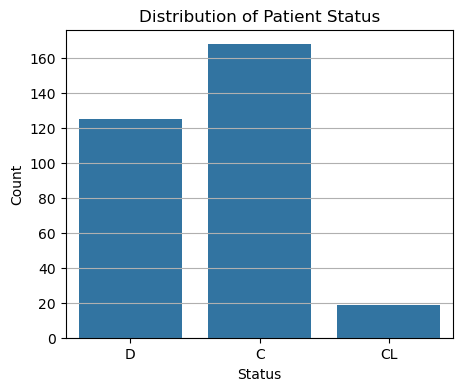

In [347]:
mtb.figure(figsize=(5, 4))
sns.countplot(x='Status', data=cirihosis_imputed, legend=False)
mtb.title('Distribution of Patient Status')
mtb.xlabel('Status')
mtb.ylabel('Count')
mtb.grid(axis='y')
mtb.show()

This bar plot shows the status of patients in the cirrhosis clinical trial dataset.

**Graph Interpretation**
The distribution is fairly balanced between the two groups:
- ~170 patients alive at last check.
- ~125 deceased indicating significant mortality rate.
- ~20 recieved liver transplant.

**Conclusions:**

- The majority of patients were censored (still alive when the study ended).
- A substantial number died during the study, indicating the severity of the condition.
- Few patients received a liver transplant (CL), suggesting either:
    - Transplants were rarely needed or
    - Access to transplants was limited.

### Trivariate Plots

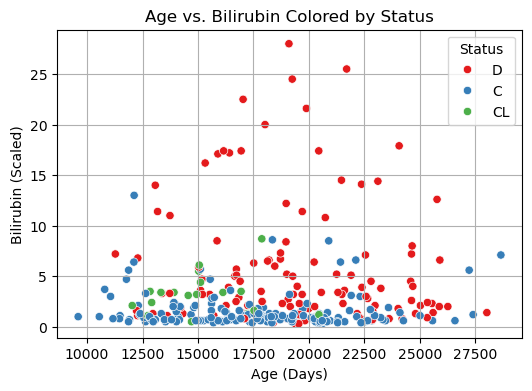

In [348]:
mtb.figure(figsize=(6, 4))
sns.scatterplot(
    data=cirihosis_imputed, 
    x='Age', 
    y='Bilirubin', 
    hue='Status', 
    palette='Set1'
)
mtb.title('Age vs. Bilirubin Colored by Status')
mtb.xlabel('Age (Days)')
mtb.ylabel('Bilirubin (Scaled)')
mtb.grid(True)
mtb.show()

**Interpretation of the Output:**
- Bilirubin is strongly linked to death (Status = D):
- Survivors (C) cluster at lower bilirubin.
- Liver transplant patients (CL) have intermediate bilirubin.
- Across the x-axis (age in days), there’s no clear horizontal pattern, meaning age alone doesn’t strongly predict status in this view.

**Conclusion:**
Bilirubin — a liver function marker — is clearly a strong predictor of mortality in cirrhosis patients. Age may play a lesser role here compared to the biochemical profile.

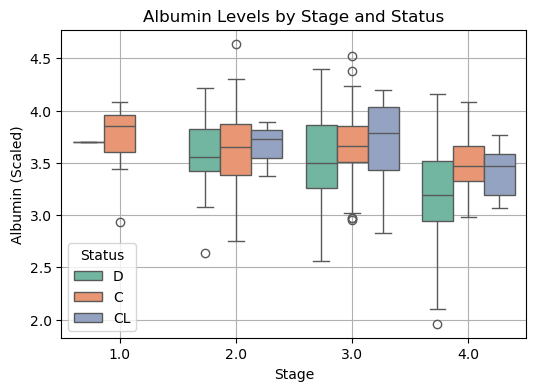

In [349]:
mtb.figure(figsize=(6, 4))
sns.boxplot(
    x='Stage',
    y='Albumin',
    hue='Status',
    data=cirihosis_imputed,
    palette='Set2'
)
mtb.title('Albumin Levels by Stage and Status')
mtb.xlabel('Stage')
mtb.ylabel('Albumin (Scaled)')
mtb.grid(True)
mtb.show()

**Interpretation:**
- Albumin levels decline with increasing stage.
- Status and Albumin are connected.
- Transplanted patients (CL) show wide variation.
- Stage 1 outliers (low albumin): A few low-albumin outliers in Stage 1 exist, possibly early signs of severe disease despite low stage.

**Conclusion:**
- Albumin is a useful indicator of disease severity and prognosis.
- Combining stage + albumin is likely helpful in predictive modeling or treatment decision-making.

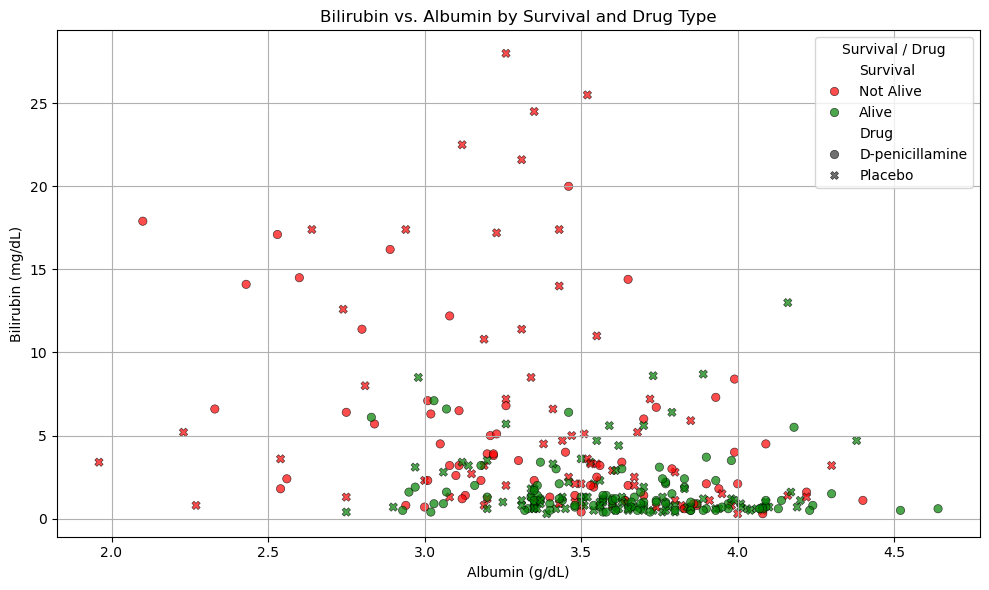

In [ ]:
cirihosis_imputed["Survival"] = cirihosis_imputed["Status"].apply(lambda x: "Alive" if x == "C" or x=="CL" else "Not Alive")

# Plot
mtb.figure(figsize=(10, 6))
sns.scatterplot(
    data=cirihosis_imputed,
    x='Albumin',
    y='Bilirubin',
    hue='Survival',
    style='Drug',
    palette={'Alive': 'green', 'Not Alive': 'red'},
    alpha=0.7,
    edgecolor='black'
)

mtb.title("Bilirubin vs. Albumin by Survival and Drug Type")
mtb.xlabel("Albumin (g/dL)")
mtb.ylabel("Bilirubin (mg/dL)")
mtb.legend(title='Survival / Drug')
mtb.grid(True)
mtb.tight_layout()
mtb.show()

**Interpretation:**

A 2D scatter plot where:

- X-axis: Albumin (a protein made by the liver — lower levels suggest poor liver function)
- Y-axis: Bilirubin (a waste product — higher levels indicate more severe liver damage)
- Color (hue): Survival Status (Alive vs. Not Alive)
- Shape (style): Drug type (D-penicillamine vs. Placebo)

**Conclusions:** 

- Alive patients (green) tend to cluster in the lower-right of the plot (Higher Albumin, Lower Bilirubin)
- Not Alive patients (red) are more spread out and especially prominent in the upper-left region (Lower Albumin, Higher Bilirubin)
- D-penicillamine and Placebo groups don't show a stark survival difference visually in this plot.
- If there's any treatment effect, it may be subtle or confounded by liver function — you may need statistical testing (e.g., stratified survival analysis or logistic regression) to detect it.
- Patients with high bilirubin and low albumin (top-left) almost entirely did not survive, regardless of drug. This suggests underlying disease severity may outweigh the effect of the drug in late-stage patients.

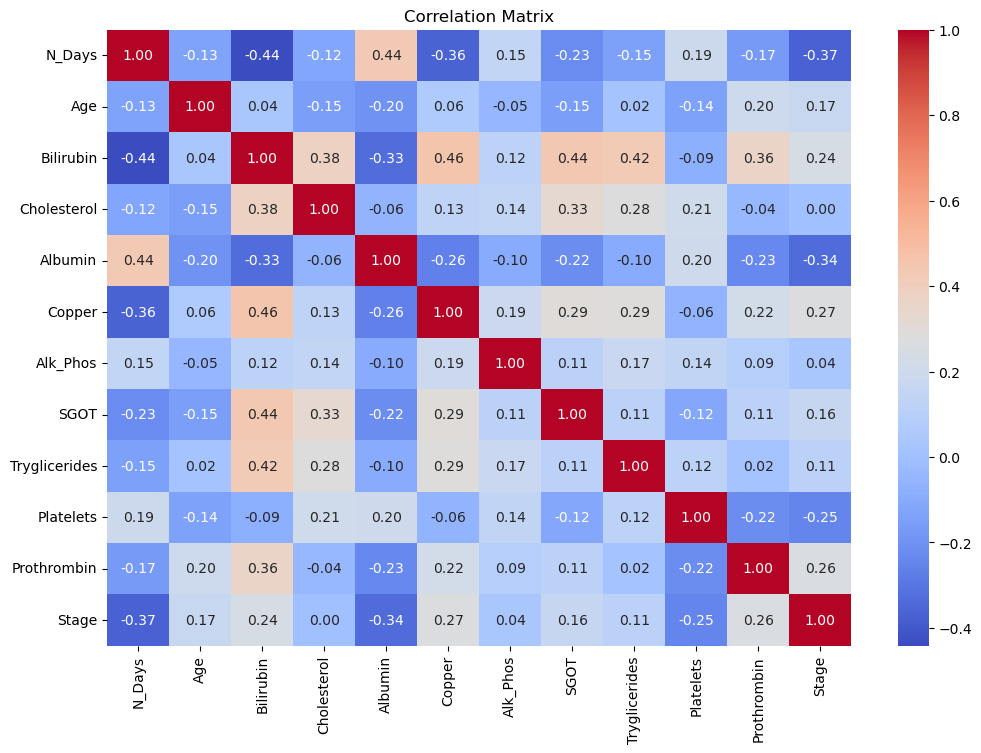

In [351]:
numeric_cols = cirihosis_imputed.select_dtypes(include='number')

mtb.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
mtb.title("Correlation Matrix")
mtb.show()

**Checking Multicollinearity**

Next we need to check for multicollinearity in the dataset by checking correlation among dependent variables. Below code does it for us. It generates a heatmap visualization of the correlation matrix using the coolwarm color map:
- Red indicates positive correlation
- Blue indicates negative correlation
- White/neutral colors indicate weak or no correlation

As a conclusion of the above output, most lab features (e.g., SGOT, Copper, Cholesterol) show weak correlations with one another. This validates the medical relevance of the dataset structure.

### Bivariate Plots

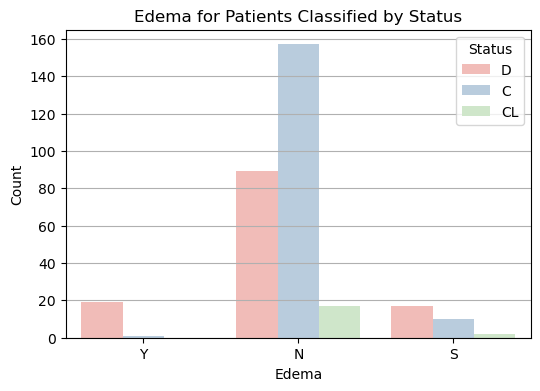

In [352]:
mtb.figure(figsize=(6, 4))
sns.countplot(
    x='Edema',
    hue='Status',
    data=cirihosis_imputed,
    palette='Pastel1'
)
mtb.title('Edema for Patients Classified by Status')
mtb.xlabel('Edema')
mtb.ylabel('Count')
mtb.grid(axis='y')
mtb.show()

**Interpretation:**

- The group of patients that survived (C) have a higher frequency of 'no edema presence and no diuretic therapy taken' (N) and very low to negligible frequency of 'edema presence with diuretics (Y) or without diuretics (S)'.
- The group of deceased patients (D) also have a significant frequency of 'no edema presence and no diuretics taken' (N) and less than 20 of such patients have 'edema presence with diuretics (Y) or edema presence without diuretics or resolved by diuretics (S)'.
- The small group of liver transplant patients mostly have 'no edema presence and no diuretic therapy taken' (N) and a negligible amount of people did take the diuretic therapy and resolved edema or had edema presence without any therapy (S).

**Conclusion:**

- Absence of edema and no diuretic use is common across all groups, especially survivors and transplant patients.
- Presence of edema despite the therapy is mostly found in deceased patients.

C:\Users\hp\AppData\Local\Temp\ipykernel_5084\66484967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Albumin', data=cirihosis_imputed, palette='Set2')


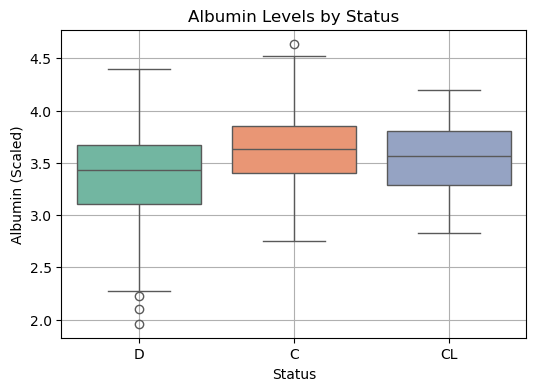

In [353]:
mtb.figure(figsize=(6, 4))
sns.boxplot(x='Status', y='Albumin', data=cirihosis_imputed, palette='Set2')
mtb.title('Albumin Levels by Status')
mtb.xlabel('Status')
mtb.ylabel('Albumin (Scaled)')
mtb.grid(True)
mtb.show()

**Interpretation:**

The boxplot depicting albumin levels across different patient statuses (D, C, CL) reveals meaningful differences in liver function among the groups. Patients who died (D) tend to have lower median albumin levels compared to those who were censored (C) or received a liver transplant (CL). This trend suggests that lower albumin levels may be associated with higher mortality in cirrhosis patients, making it a potential prognostic indicator. Additionally, the D group shows a wider interquartile range and a greater number of low-end outliers, indicating more variability and frequent occurrences of critically low albumin. In contrast, the C and CL groups display tighter distributions and higher median values, reflecting relatively better liver function and possibly more stable clinical conditions.

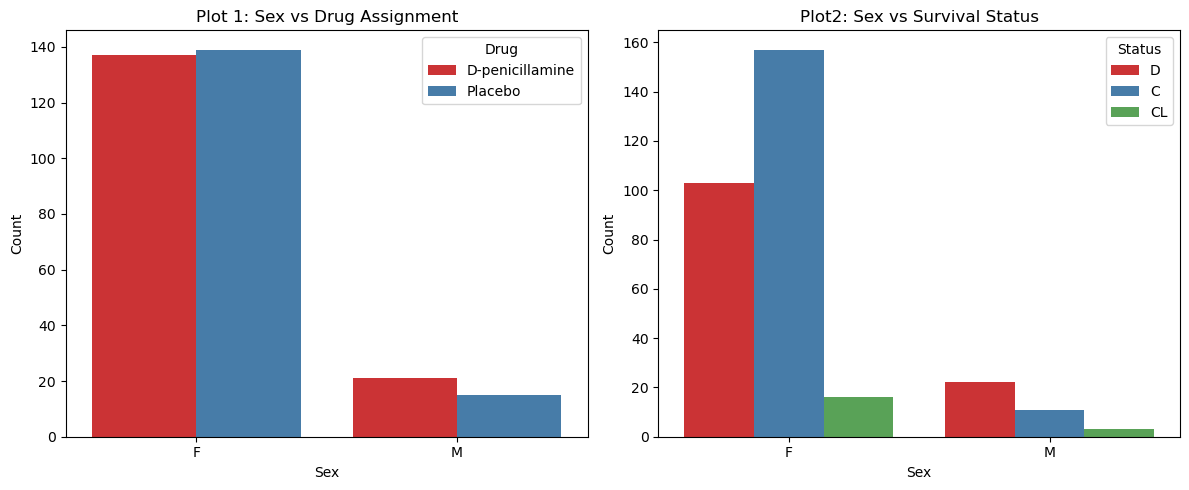

In [367]:
fig,axes = mtb.subplots(1,2,figsize=(12,5))

sns.countplot(x='Sex', hue='Drug', data=cirihosis_imputed, palette='Set1', ax=axes[0])
axes[0].set_title('Plot 1: Sex vs Drug Assignment')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

sns.countplot(x='Sex', hue='Status', data=cirihosis_imputed, palette='Set1', ax=axes[1])
axes[1].set_title('Plot2: Sex vs Survival Status')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
mtb.tight_layout()
mtb.show()

**Conclusion:**
This plot 1 confirms that sex does not play a major role in drug allocation in this clinical trial. Both males and females were assigned to both treatment groups, supporting the assumption of random assignment in the study design.

The bar chart (figure 2) illustrating the distribution of patient status across sexes (F for female, M for male) shows a significant predominance of female patients in the dataset. Among females, the majority fall under the censored (C) status, followed by the deceased (D) and then the liver transplant (CL) group. This suggests that a large proportion of female patients were still alive or lost to follow-up at the time of data collection. In the male subgroup, overall numbers are much lower, but the trend is similar—more patients are in the D and C categories than in CL. Interestingly, a slightly higher proportion of male patients are in the deceased group compared to censored, suggesting a potentially worse outcome for male patients, though the smaller sample size should be considered when interpreting this. Overall, the chart highlights gender imbalance in the dataset and provides insight into outcome distributions based on sex.

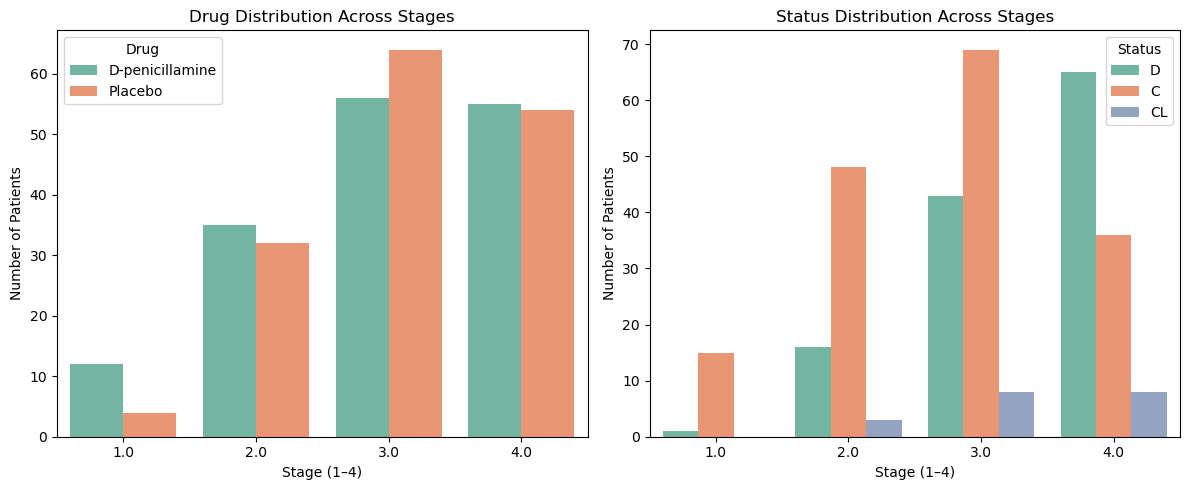

In [368]:
fig, axes = mtb.subplots(1,2, figsize=(12,5))

sns.countplot(x='Stage', hue='Drug', data=cirihosis_imputed, palette='Set2', ax = axes[0])
axes[0].set_title('Drug Distribution Across Stages')
axes[0].set_xlabel('Stage (1–4)')
axes[0].set_ylabel('Number of Patients')


sns.countplot(x='Stage', hue='Status', data=cirihosis_imputed, palette='Set2',ax = axes[1])
axes[1].set_title('Status Distribution Across Stages')
axes[1].set_xlabel('Stage (1–4)')
axes[1].set_ylabel('Number of Patients')
mtb.tight_layout()
mtb.show()

**Interpretation:**
- Stage 3 has the highest number of patients overall, indicating it is the most common disease stage in this dataset.
- Across all stages, both D-penicillamine and Placebo are almost evenly distributed, which reflects balanced randomization in the clinical trial design.
- Minor variations exist, for example:
    - In Stage 1, D-penicillamine has noticeably more patients than Placebo.
    - In Stage 3, Placebo slightly dominates.
- This plot helps in assessing the fairness of drug assignment across different disease stages.

The bar chart titled "Status Distribution Across Stages" illustrates the number of patients at different stages of cirrhosis (Stage 1 to Stage 4), segmented by their medical status: D (Deceased), C (Censored/Alive), and CL (Liver Transplant/Clinically Resolved).

From the chart, it is evident that as the disease progresses from Stage 1 to Stage 4, there is a general increase in the number of patients. In Stage 1, the number of patients is relatively low across all status categories, with the majority being censored (C), and very few deceased (D) or clinically resolved (CL). At Stage 2, there is a noticeable rise in both deceased and censored patients, with the censored group being the highest. Stage 3 shows the peak in deceased patients (D), which exceeds both other categories and suggests increased mortality at this stage. The number of censored patients also remains high, while clinically resolved cases remain minimal. Interestingly, at Stage 4, while deceased cases decline, the number of censored patients reaches its highest, indicating that many patients are alive despite advanced disease. Clinically resolved (CL) cases are consistently low across all stages, but slightly more visible in Stages 3 and 4.

**Conclusion:**
The grouped bar chart effectively demonstrates that the clinical trial maintains balance in drug allocation across all disease stages, ensuring that comparisons between treatment outcomes are valid and not skewed by disproportionate group sizes. Hence, there is no significant impact of disease stages on drug allocation. As compared to this, survival varies greatly on the basis of stage and again indicating that predicting patient survival would be better than drug classification.

## Literature Review

**Introduction**
Liver cirrhosis is a progressive condition characterized by the replacement of healthy liver tissue with scar tissue, leading to impaired liver function. The management of cirrhosis often involves pharmacological interventions aimed at mitigating symptoms and slowing disease progression. However, patient responses to these treatments can vary significantly, necessitating personalized approaches to therapy. Machine learning (ML) has emerged as a powerful tool in predicting patient outcomes and tailoring treatments based on individual patient data.

**Machine Learning in Cirrhosis Prognostication**
Recent studies have demonstrated the efficacy of ML models in predicting outcomes for cirrhosis patients. For instance, a study by Yu et al. (2022) developed AutoML models to predict 30-day mortality in patients with non-cholestatic cirrhosis, achieving superior performance compared to traditional scoring systems like MELD and MELD-Na . Similarly, another study constructed a predictive model for hepatorenal syndrome (HRS) in cirrhosis patients, utilizing variables such as spontaneous bacterial peritonitis and total bilirubin, and achieved an AUC of 0.832 in the training set .

**Feature Selection Techniques**
Effective feature selection is crucial in building robust ML models, especially when dealing with high-dimensional medical data. Knowledge-based feature selection methods, which incorporate biological insights, have been shown to improve model interpretability and performance in drug response prediction . Additionally, techniques like Auto-HMM-LMF have been proposed to efficiently predict cell line-drug associations by focusing on selecting a subset of inputs with significant contributions .

**Drug Response Prediction Models**
In the realm of drug response prediction, ML models have been employed to forecast patient responses to various treatments. For example, a study utilized ML algorithms to predict 28-day mortality in patients with hepatic encephalopathy, identifying factors such as total bilirubin and albumin as significant predictors . These models not only aid in risk stratification but also in optimizing therapeutic strategies for individual patients.

**Integration of Clinical and Laboratory Data**
The integration of diverse data types, including clinical and laboratory data, enhances the predictive capabilities of ML models. A study assessing ML models for predicting advanced liver fibrosis in autoimmune hepatitis patients demonstrated that combining routine clinical features with ML techniques can effectively assess disease progression . This integrative approach underscores the potential of ML in providing comprehensive assessments of patient health status.

**Conclusion**
The application of machine learning in predicting drug responses and outcomes in cirrhosis patients holds significant promise. By leveraging advanced feature selection techniques and integrating multifaceted patient data, ML models can facilitate personalized treatment plans, ultimately improving patient care and outcomes.

## Conclusion

This analysis explored the Cirrhosis Clinical Trial Dataset with the aim of performing a comprehensive preprocessing, exploration, and classification study to evaluate how various clinical features affect the survival status of a patient. Through rigorous preprocessing, missing values were addressed via imputation or removal, depending on their relevance to the target classification variable and prior information on the data.

**Exploratory Data Analysis (EDA) revealed insightful patterns:**

- Variables such as Cholesterol, Copper, Bilirubin, Alkaline Phosphate, SGOT, Tryglicerides, Prothrombin displayed right-skewed distributions.
- Count plots, box plots and scatterplots showed that survival status had strong relationship with gender, stage of disease and Bilirubin levels.
- The correlation heatmap indicated that no strong multicollinearity existed between variables.
- The visual analysis also helped uncover subgroup behaviors — for instance, variations in Albumin levels by status and disease stage, and the distribution of Edema among patients, colored by status type.

In summary, the analysis validated the dataset’s suitability for logistic regression classification, with all preprocessing steps, statistical tests, and visual explorations aligned with machine learning best practices.

**Note:** During the exploration phase, our aim to prepare a model for drug classification considering 'Drug' variable as target was changed as the 'Drug' assignment doesn't vary significantly due to any of the factors from patient to patient.Hence, we revisited the dataset where we identified a new approach by changing our objective to classify patient status based on the given features.

The project not only fulfills the analytical objectives outlined in the guidelines but also lays a strong foundation for predictive modeling in subsequent phases.

In [ ]:
# cirihosis_imputed = cirihosis_imputed.drop("Survival",axis=1)
cirihosis_imputed.to_csv("cirihosis_updated.csv", index=False)

## References

1. Yu, C., et al. (2022). Automated Machine Learning in Predicting 30-Day Mortality in Patients with Non-Cholestatic Cirrhosis. Journal of Personalized Medicine, 12(11), 1930. https://doi.org/10.3390/jpm12111930

2. Development and validation of a machine learning-based prediction model for hepatorenal syndrome in liver cirrhosis patients. Scientific Reports. https://www.nature.com/articles/s41598-025-86674-9

3. Comparative evaluation of feature reduction methods for drug response prediction. Scientific Reports. https://www.nature.com/articles/s41598-024-81866-1

4. Auto-HMM-LMF: Feature selection based method for prediction of drug response. BMC Bioinformatics. https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-021-03974-3

5. Using machine learning methods to predict 28-day mortality in patients with hepatic encephalopathy. BMC Gastroenterology. https://bmcgastroenterol.biomedcentral.com/articles/10.1186/s12876-023-02753-z

6. An exploratory machine learning model for predicting advanced liver fibrosis in autoimmune hepatitis patients. Annals of Hepatology. https://www.elsevier.es/en-revista-annals-hepatology-16-articulo-an-exploratory-machine-learning-model-S1665268124005374

7. fedesoriano. (2021). Cirrhosis Prediction Dataset. Kaggle.com. https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset